# Per-Project Summary Statistics

In [32]:
import os
homepath = os.path.join(os.path.expanduser("~"), 'dev/azul')
os.chdir(homepath)
import scanpy as sc
import loompy
from src.azul.service.proj_summary_stats import ProjSummaryStats

In [33]:

loomfile = 'test/service/data_generator/f9e363cd-7fa5-4349-add2-1c9bd86d10c8.loom'
adata1 = sc.read(loomfile, sparse=True, cleanup=False, X_name='spliced', obs_names='CellID')
adata1.var_names_make_unique()

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [34]:
adata1.var_names

Index(['TSPAN6', 'TNMD', 'DPM1', 'SCYL3', 'C1orf112', 'FGR', 'CFH', 'FUCA2',
       'GCLC', 'NFYA',
       ...
       'BX005132.2', 'AL645728.2', 'PDE11A-1', 'AL163152.1', 'AL139254.3',
       'AL591163.1', 'AL589702.1', 'AC068587.10', 'AL034417.4', 'AL513220.1'],
      dtype='object', length=63925)

In [35]:
adata1

AnnData object with n_obs × n_vars = 757 × 63925 
    obs: 'cell_suspension.provenance.document_id', 'derived_organ_label', 'derived_organ_ontology', 'derived_organ_part_label', 'derived_organ_part_ontology', 'donor_organism.development_stage.ontology', 'donor_organism.development_stage.ontology_label', 'donor_organism.diseases.ontology', 'donor_organism.diseases.ontology_label', 'donor_organism.human_specific.ethnicity.ontology', 'donor_organism.human_specific.ethnicity.ontology_label', 'genes_detected', 'library_preparation_protocol.end_bias', 'library_preparation_protocol.input_nucleic_acid_molecule.ontology', 'library_preparation_protocol.input_nucleic_acid_molecule.ontology_label', 'library_preparation_protocol.library_construction_method.ontology', 'library_preparation_protocol.library_construction_method.ontology_label', 'library_preparation_protocol.provenance.document_id', 'library_preparation_protocol.strand', 'project.project_core.project_short_name', 'specimen_from_organism

In [36]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738 
    var: 'gene_ids'

In [37]:
loom = loompy.connect(loomfile)
loom

,,,,,,,CellID,00f8d4a4-ecf5-411c-bfe2-6e82a6d86b2f,03ed5204-f11e-4633-a930-4841e3ec16d3,054e20d8-c48a-4790-b179-d9df837905b9,0bb3a24d-bb05-44c8-8154-1ccb30ff8420,0c79d510-067c-4103-ba08-295a10a522ae,104f7011-4a64-49a2-a20b-f4824ec8b3d3,1227882d-d6be-43dc-be0b-270b163fe8f4,16137206-c627-43e5-b7f6-b60db7920e0e,164fd3ac-cf1b-46f6-be05-cf582eb61d58,17e0e690-6e31-4e27-a325-0fecc9c2682f,...
,,,,,,,cell_suspension.provenance.document_id,00f8d4a4-ecf5-411c-bfe2-6e82a6d86b2f,03ed5204-f11e-4633-a930-4841e3ec16d3,054e20d8-c48a-4790-b179-d9df837905b9,0bb3a24d-bb05-44c8-8154-1ccb30ff8420,0c79d510-067c-4103-ba08-295a10a522ae,104f7011-4a64-49a2-a20b-f4824ec8b3d3,1227882d-d6be-43dc-be0b-270b163fe8f4,16137206-c627-43e5-b7f6-b60db7920e0e,164fd3ac-cf1b-46f6-be05-cf582eb61d58,17e0e690-6e31-4e27-a325-0fecc9c2682f,...
,,,,,,,derived_organ_label,pancreas,pancreas,pancreas,pancreas,pancreas,pancreas,pancreas,pancreas,pancreas,pancreas,...
,,,,,,,derived_organ_ontology,UBERON:0001264,UBERON:0001264,UBERON:0001264,UBERON:0001264,UBERON:0001264,UBERON:0001264,UBERON:0001264,UBERON:0001264,UBERON:0001264,UBERON:0001264,...
,,,,,,,derived_organ_part_label,islet of Langerhans,islet of Langerhans,islet of Langerhans,islet of Langerhans,islet of Langerhans,islet of Langerhans,islet of Langerhans,islet of Langerhans,islet of Langerhans,islet of Langerhans,...
,,,,,,,derived_organ_part_ontology,UBERON:0000006,UBERON:0000006,UBERON:0000006,UBERON:0000006,UBERON:0000006,UBERON:0000006,UBERON:0000006,UBERON:0000006,UBERON:0000006,UBERON:0000006,...
,,,,,,,donor_organism.development_stage.ontology,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...
,,,,,,,donor_organism.development_stage.ontology_label,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,...
,,,,,,,donor_organism.diseases.ontology,PATO:0000461,PATO:0000461,PATO:0000461,PATO:0000461,PATO:0000461,PATO:0000461,PATO:0000461,PATO:0000461,PATO:0000461,PATO:0000461,...
,,,,,,,donor_organism.diseases.ontology_label,normal,normal,normal,normal,normal,normal,normal,normal,normal,normal,...
,,,,,,,donor_organism.human_specific.ethnicity.ontology,HANCESTRO:0005,HANCESTRO:0008,HANCESTRO:0005,HANCESTRO:0016,HANCESTRO:0005,HANCESTRO:0005,HANCESTRO:0005,HANCESTRO:0005,HANCESTRO:0008,HANCESTRO:0005,...


In [40]:
sc.pl.highest_expr_genes(adata1, n_top=20)

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


ValueError: cannot reindex from a duplicate axis

In [5]:
pss = ProjSummaryStats(loomfile, 20)
expression_variance, gene_with_max_expression_per_cell = pss.compute()

In [8]:
expression_variance

['FP671120.3',
 'FP236383.2',
 'FP236383.3',
 'GCG',
 'INS',
 'MT-RNR2',
 'PRSS1',
 'PRSS2',
 'REG1A',
 'TTR',
 'AC010970.1',
 'MALAT1',
 'SST',
 'CLPS',
 'CPA1',
 'MT-CO1',
 'CPB1',
 'CELA3A',
 'PNLIP',
 'CTRB2']

Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'derived_organ_label' as categorical
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'derived_organ_ontology' as categorical
Trying to set attribute `.obs` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
... storing 'derived_organ_part_label' as categorical
Trying to set at

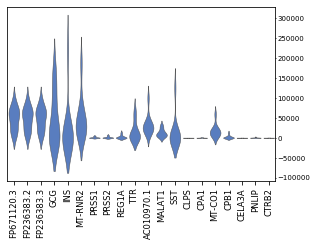

In [9]:
group_key = adata.obs['cell_suspension.provenance.document_id']
#sc.pl.stacked_violin(adata, list(adata.var_names)[:5], swap_axis=True)
sc.pl.stacked_violin(adata[:10], expression_variance, grouby=group_key, swap_axis=True, use_raw=False)

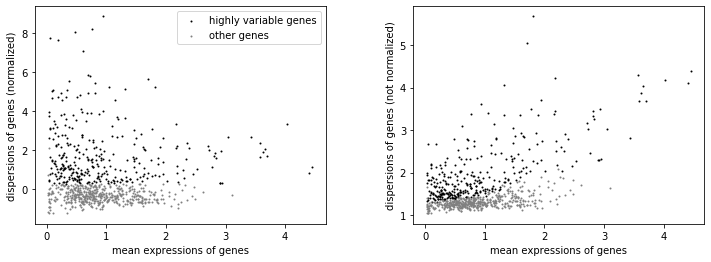

In [15]:
adata = sc.datasets.pbmc68k_reduced()  # scanpy demo data
sc.pl.highly_variable_genes(adata)

In [16]:
adata.obs

,bulk_labels,n_genes,percent_mito,n_counts,S_score,G2M_score,phase,louvain
index,,,,,,,,
AAAGCCTGGCTAAC-1,CD14+ Monocyte,1003,0.023856,2557.0,-0.119160,-0.816889,G1,1
AAATTCGATGCACA-1,Dendritic,1080,0.027458,2695.0,0.067026,-0.889498,S,1
AACACGTGGTCTTT-1,CD56+ NK,1228,0.016819,3389.0,-0.147977,-0.941749,G1,3
AAGTGCACGTGCTA-1,CD4+/CD25 T Reg,1007,0.011797,2204.0,0.065216,1.469291,G2M,9
ACACGAACGGAGTG-1,Dendritic,1178,0.017277,3878.0,-0.122974,-0.868185,G1,2
ACAGTTCTTAGCCA-1,CD19+ B,1531,0.022347,4967.0,-0.028018,-0.912565,G1,8
ACATTCTGACTACG-1,Dendritic,1036,0.017159,2914.0,-0.181505,-0.617387,G1,5
ACCCTCGAGTGAGG-1,Dendritic,1250,0.010741,3817.0,-0.124939,-0.769430,G1,2
ACTGGCCTTTTCGT-1,CD8+ Cytotoxic T,1282,0.018118,4581.0,0.134635,-1.071574,S,3


In [17]:
adata

AnnData object with n_obs × n_vars = 700 × 765 
    obs: 'bulk_labels', 'n_genes', 'percent_mito', 'n_counts', 'S_score', 'G2M_score', 'phase', 'louvain'
    var: 'n_counts', 'means', 'dispersions', 'dispersions_norm', 'highly_variable'
    uns: 'bulk_labels_colors', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'rank_genes_groups'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [18]:
adata.var

,n_counts,means,dispersions,dispersions_norm,highly_variable
index,,,,,
HES4,1153.387451,0.592365,2.028047,2.771764,True
TNFRSF4,304.358154,0.193332,1.760724,2.746426,True
SSU72,2530.272705,1.019981,1.208284,-0.631160,False
PARK7,7451.664062,1.828078,1.288261,-0.544716,False
RBP7,272.811035,0.174943,1.842789,3.192285,True
SRM,1951.078857,0.861733,1.579264,0.830446,True
MAD2L2,1020.823303,0.539625,1.256583,-0.364477,False
AGTRAP,1404.187622,0.685122,1.427224,0.329231,True
TNFRSF1B,1449.664551,0.701057,1.573476,0.923793,True


In [20]:
!mkdir data
!wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O data/pbmc3k_filtered_gene_bc_matrices.tar.gz
!cd data; tar -xzf pbmc3k_filtered_gene_bc_matrices.tar.gz

--2019-07-18 15:15:50--  http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 54.192.146.102, 54.192.146.238, 54.192.146.252, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|54.192.146.102|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7621991 (7.3M) [application/x-tar]
Saving to: ‘data/pbmc3k_filtered_gene_bc_matrices.tar.gz’

data/pbmc3k_filtere 100%[===================>]   7.27M  8.67MB/s    in 0.8s    

2019-07-18 15:15:51 (8.67 MB/s) - ‘data/pbmc3k_filtered_gene_bc_matrices.tar.gz’ saved [7621991/7621991]



In [21]:
adata = sc.read_10x_mtx(
    './data/filtered_gene_bc_matrices/hg19/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)    

In [22]:
adata.var_names_make_unique()

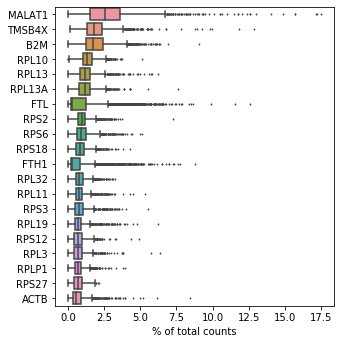

In [23]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [24]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738 
    var: 'gene_ids'